In [1]:
from scmodels import SCM
import random, math

In [2]:
def get_distributions():
    ep = .1
    dists = [
        f"LogLogistic(alpha={random.randint(5, 20)}, beta={round(random.uniform(1,3.5),1)})",
        f"Normal(mean={random.randint(0,10)}, std={round(random.uniform(1,20),2)})",
        f"LogNormal(mean={random.randint(0,10)}, std={round(random.uniform(1,20),2)})",
        f"Benini(alpha={round(random.random() + ep, 1)}, beta={round(random.random() + ep, 1)}, sigma={round(random.random() + ep, 1)})",
        f"Beta(alpha={round(random.random() + ep, 1)}, beta={round(random.random() + ep, 1)})",
        f"Exponential(rate={round((random.random() + ep) * 10, 1)})",
        f"FDistribution(d1={random.randint(2, 4)}, d2={random.randint(5, 8)})",
        f"Gamma(k={round((random.random() + ep) * 4, 1)}, theta={round((random.random() + ep) * 8, 1)})",
        f"GammaInverse(a={round((random.random() + ep) * 4, 1)}, b={round((random.random() + ep) * 8, 1)})",
        f"Bernoulli({round(random.random(), 1)})",
        f"Binomial(n={random.randint(2, 10)}, p={round(random.random(), 1)}, succ={random.randint(3, 20)}, fail={random.randint(3, 20)})",
        f"BetaBinomial(n={random.randint(10, 100)}, alpha={round(random.random() + ep, 1)}, beta={round(random.uniform(2, 5),1)})",
        f"Die(sides={random.randint(4, 10)})",
        f"DiscreteUniform(items='1 2 3')",
        f"Geometric(p={round(random.random(), 2)})",
        f"Poisson(lamda={round(random.random() + ep, 1)})",
        f"FiniteRV({{{random.randint(5, 10)}: 1/2, {random.randint(0, 3)}: 1/6, {random.randint(15, 25)}: 1/6, {random.randint(30, 50)}: 1/6}})"
    ]
    
    return dists

In [3]:
def get_child_distribution(parents):
    simple_ops = ["+", "*", "-"]
    complex_ops = [False, "sqrt"]
    noise_ops = [True, False]
    dist = f"{parents[0]}"
    count = 0
    for p in parents[1:]:
        op = random.sample(simple_ops, 1)[0]
        dist = f"{dist} {op} {p}"
        count += 1
        
        if count > 2:
            op = random.choices(complex_ops, weights=(500, 5), k=1)[0]
            if op:
                dist = f"{op}({dist})"
        
        op = random.choices(noise_ops, weights=(10, 90), k=1)[0]
        if op:
            dist = f"{dist} * N"
    
    dist = f"{dist} * N"
    return dist

In [4]:
def get_parents(levels_and_distributions):
    parent_levels = random.randint(1,len(levels_and_distributions))
    parents = []
    for level in range(parent_levels):
        possible_parents = levels_and_distributions[level][1]
        num_parents = random.randint(1, len(possible_parents))
        parents.extend(random.sample(possible_parents, num_parents))
    
    return parents

In [5]:
def populate_level_distributions(level, level_data, levels_and_distributions):
    level_dists = []
    dist_names = []
    for n in range(level_data['num']):
        name = level_data['name']+str(n+1)
        
        if level == 0:
            dist = "N"
        else:
            dist = get_child_distribution(get_parents(levels_and_distributions))
            
        dist = f"{name} = {dist}, N ~ {random.sample(get_distributions(), 1)[0]}"
        level_dists.append(dist)
        dist_names.append(name)
    
    levels_and_distributions[level] = (level_dists, dist_names)

In [6]:
def create_names_and_num_nodes_dict(nodes_per_level, level_names):
    level_name_numnodes = {}
    for n, name in enumerate(level_names):
        level_name_numnodes[n] = {'name': name, 'num': nodes_per_level[n]}
        
    return level_name_numnodes

In [7]:
def create_scm_from_nodes_list(nodes_list):
    level_names = get_level_names(nodes_per_level)
    level_name_numnodes = create_names_and_num_nodes_dict(nodes_per_level, level_names)

In [8]:
def get_level_names(numnodes_per_level):
    level_names = []
    for n in range(len(numnodes_per_level)):
        level_names.append(chr(65 + n))
    
    return level_names

In [9]:
def get_numnodes_per_level(input_nodes):
    nodes = input_nodes
    levels = int(math.pow(nodes, 1/3))
    numnodes_per_level = []
    for n in range(levels):
        ub = round(math.log(nodes)) - 0.6
        lb = ub - 0.7
        level_nodes = int(math.exp(round(random.uniform(lb,ub), 1)))
        if level_nodes == 0 : break

        numnodes_per_level.append(level_nodes)
        nodes -= level_nodes
        
    return numnodes_per_level

In [10]:
def create_scm(level_name_numnodes):
    levels_and_distributions = {}
    for level, level_data in level_name_numnodes.items():
        populate_level_distributions(level, level_data, levels_and_distributions)


    scm_dists = levels_and_distributions[0][0]
    for n in range(1, len(levels_and_distributions)):
        scm_dists.extend(levels_and_distributions[n][0])
    
    scm = SCM(
        scm_dists
    )
    
    return scm

In [11]:
def create_scm_from_nodes_list(nodes_list):
    level_names = get_level_names(nodes_list)
    level_name_numnodes = create_names_and_num_nodes_dict(nodes_list, level_names)
    
    scm = create_scm(level_name_numnodes)
    return scm

In [12]:
def create_scm_from_num_nodes(input_nodes):
    nodes_list = get_numnodes_per_level(input_nodes)
    scm = create_scm_from_nodes_list(nodes_list)
    return scm

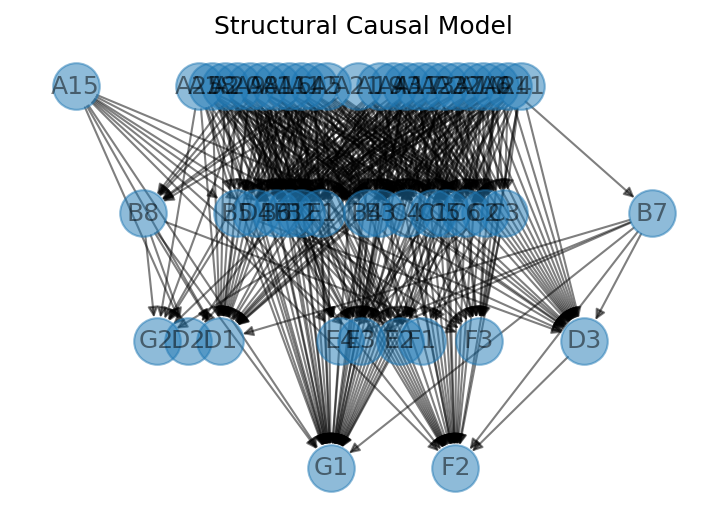

In [15]:
input_nodes = [25, 8, 6, 4, 4, 3, 2]
# input_nodes = 50
if __name__ == "__main__":  
    if type(input_nodes) == list:
        scm = create_scm_from_nodes_list(input_nodes)
    else:
        scm = create_scm_from_num_nodes(input_nodes)
    scm.plot();

In [16]:
scm.sample(100)

<lambdifygenerated-115>:2: RuntimeWarning: invalid value encountered in sqrt
  return A18*N + A19 + A25 - A8 + sqrt(-A11 + A14 + A17 + A21 - A23 + A3)


A1        A2        A3        A4         A5    A6   A7        A8  \
0   2.0  0.352618  1.812636  0.022171   7.078343   9.0  1.0  0.791376   
1   1.0  0.217549  2.097055  1.259265  28.357189  43.0  2.0  1.617955   
2   2.0  0.456824  2.528636  0.742263   4.968695   9.0  2.0  1.029745   
3   1.0  0.480379  1.373921  0.061984  10.342519   9.0  1.0  5.217355   
4   2.0  0.368814  3.184331  1.805168   3.059477   3.0  3.0  0.700235   
..  ...       ...       ...       ...        ...   ...  ...       ...   
95  1.0  0.558931  2.235024  0.075035  51.638134   3.0  3.0  2.242602   
96  2.0  1.273807  7.292034  2.400063   5.692255   3.0  3.0  0.601276   
97  2.0  1.137043  3.311165  0.175894   8.320077  25.0  2.0  0.165226   
98  1.0  0.405096  1.316108  0.430537   8.656141  25.0  1.0  0.360286   
99  3.0  1.643640  2.025566  1.240452  13.014726  43.0  1.0  0.725910   

          A9       A10  ...            D3             E4            G2  \
0   0.044876  5.186414  ...  -1990.987439       0.680177  9.615470e+04   
1   0.224101  3.966494  ...           NaN            NaN           NaN   
2   0.460285  1.837362  ...           NaN            NaN           NaN   
3   2.252003  2.406610  ...           NaN            NaN           NaN   
4   1.174336  4.142534  ...           NaN            NaN           NaN   
..       ...       ...  ...           ...            ...           ...   
95  0.424761  1.173125  ...  -2476.815575    2680.168568  4.280226e+06   
96  0.520393  1.018299  ...           NaN            NaN           NaN   
97  3.541864  2.338385  ...           NaN            NaN           NaN   
98  1.262626  2.894988  ...   1028.129624  -64069.635341  1.393119e+05   
99  1.186119  3.911908  ... -12925.555604 -897870.075937  1.838767e+06   

              D2            E2           E3             F1            F3  \
0   -2158.843649 -1.598337e+05    61.430358 -170573.907977  1.025180e+03   
1   37051.466958  5.885011e+06          NaN            NaN           NaN   
2   -6935.028773  3.790149e+04          NaN            NaN           NaN   
3    1755.460936  7.129515e+01          NaN            NaN           NaN   
4    2074.563508 -2.926997e+04          NaN            NaN           NaN   
..           ...           ...          ...            ...           ...   
95  -4811.290641 -2.413795e+07  2079.229760  -28538.712316  8.057721e+45   
96   -929.948562  3.269293e+05          NaN            NaN           NaN   
97   5376.278131  1.473088e+06          NaN            NaN           NaN   
98   1800.547860  1.372535e+04   483.691815  -93945.892230  5.507233e+06   
99   1166.009996  2.867598e+05   129.744044   -3730.459280  1.983519e+06   

              F2            G1  
0   1.911023e+08 -7.140446e+04  
1            NaN           NaN  
2            NaN           NaN  
3            NaN           NaN  
4            NaN           NaN  
..           ...           ...  
95  2.794352e+49 -1.822082e+07  
96           NaN           NaN  
97           NaN           NaN  
98 -1.138851e+09  2.205690e+05  
99  4.195700e+08 -2.208606e+05  

[100 rows x 52 columns]